# LSTM: Long-short time memory networks
Fueron inventadas con el fin de remediar el vanishing/exploding gradient. Una aplicacion comun en RNNs es predecir la proxima palabra.
Por ejemplo para adivinar la proxima palabra en la frase

"Henry pide burritos cada vez que va a un restaurante. Debe ser que a Henry le gusta mucho la cocina ????"

"Henry pide **burritos** cada vez que va a un restaurante. Debe ser que a Henry le gusta mucho la cocina **Mexicana**.

Normalmente las RNN tienen la capacidad de regresarse hasta 6 palabras, pero en este caso necesitamos regresar 18 palabras.

Las LSTM fueron inventadas por Hochereiter y Schmidhuber (el primero estudiante de doctorado y el segundo el asesor de tesis)
en 1997. Referencia completa en las notas de clase.

Las LSTM tienen muchos "sabores". Aca discutimos una de ellas  con detalle y mostramos como son otras sin tanto detalle.

## Propagacion hacia adelante de las LSTM
Redes neuronales de memoria larga y corta.

El metodo se basa en las graficas que incluiremos aca.

La Figura 5.30 muestra una RNN (vanilla=basica)


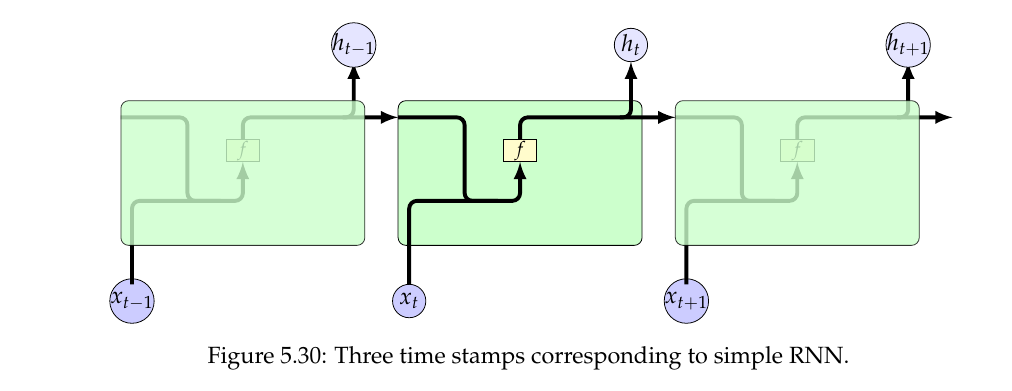

La red de la figura 5.30 se puede describir como

$$h_t = f(\Theta_x x_t + \Theta_h h_{t-1}). $$

La Figura 5.31 (abajo) describe una LSTM globalmente. El objetivo de esta clase es describir todos los detalles que envuelven la LSTM.



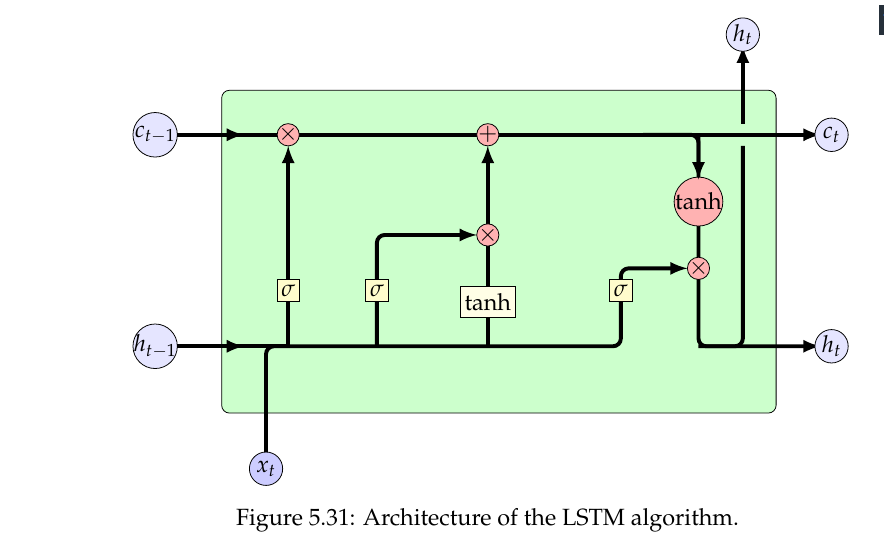

Ya de forma oral di la descripcion general de esta red. Ahora vamos a ir a los detalles. La caja esta computesta por 3 "gates" (compuertas):

1. Forget gate (la de olvido)
2. Input gate
3. Output gate.

Las tres compuertas las muestro en la Figura 5.32



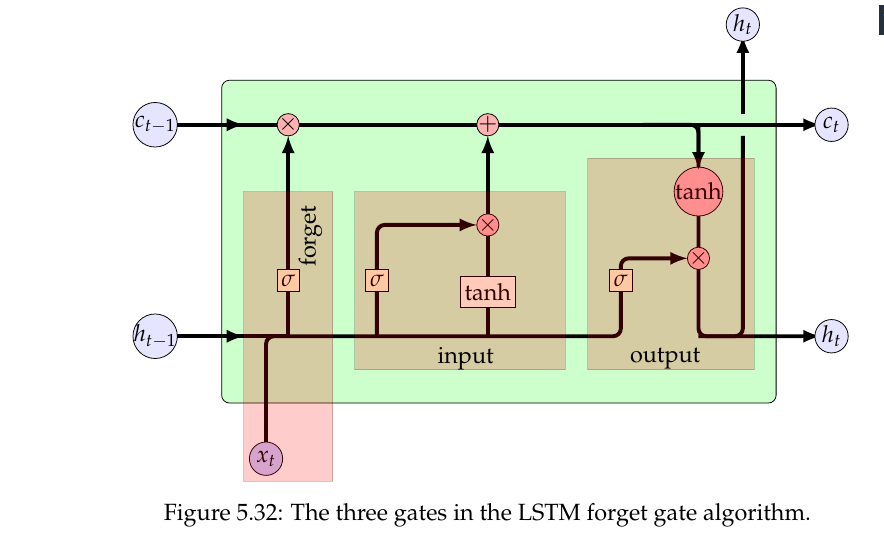

## Forget


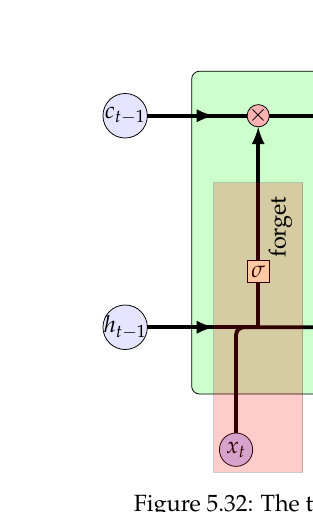

Las matematica de esta compuerta es
Notacion:
* Las matrices que pesan los datos son $W$
* Las matrices que pesan los  $h$ (la memoria corta) son $V$
* El bias (sesgo) es $b$
Cada uno tiene el subindice $f$ (de forget), $i$ (de input), $o$ de output

$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) $$
Es bueno ver en contexto como espacios vectoriales.
(analisis dimensional)

$$x_t \in \mathbb{R}^d \quad , \quad h_{t-1} \in \mathbb{R}^{h} \quad , \quad
W_f \in \mathbb{R}^{h \times d} \quad , \quad U_f \in \mathbb{R}^{h \times h} \quad , \quad f_t \in \mathbb{R}^h$$

$\sigma$ es la funcion logistica

$$\sigma(t) = \frac{1}{1 + \exp(-t)} $$

Hasta donde vamos

$$c_t = f_t \circ c_{t-1} $$


Por que se llama "forget"? es por que la sigmoid podria tener un valor muy pequenho, cercano a 0. Si $\sigma(t) \approx 0$, como esto  quiere decir que $f_t \approx 0$ y por lo tanto anula el $c_{t-1}$ (anula=olvida). Puede ser que $\sigma(t) \approx 1$
en este caso preserva la memoria larga de $c_{t-1}$.

## Input Gate (compuerta de entrada)


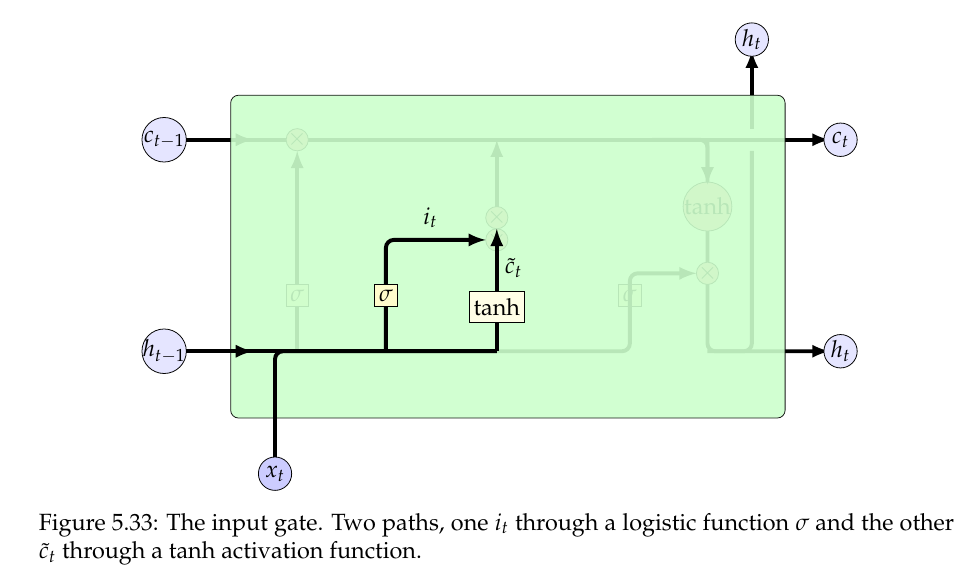

$$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i) $$
$$\tilde{c}_t = \tanh(W_g x_t + U_g h_{t-1} + b_g )  $$

Debemos conectar esto con la memoria larga $c_t$

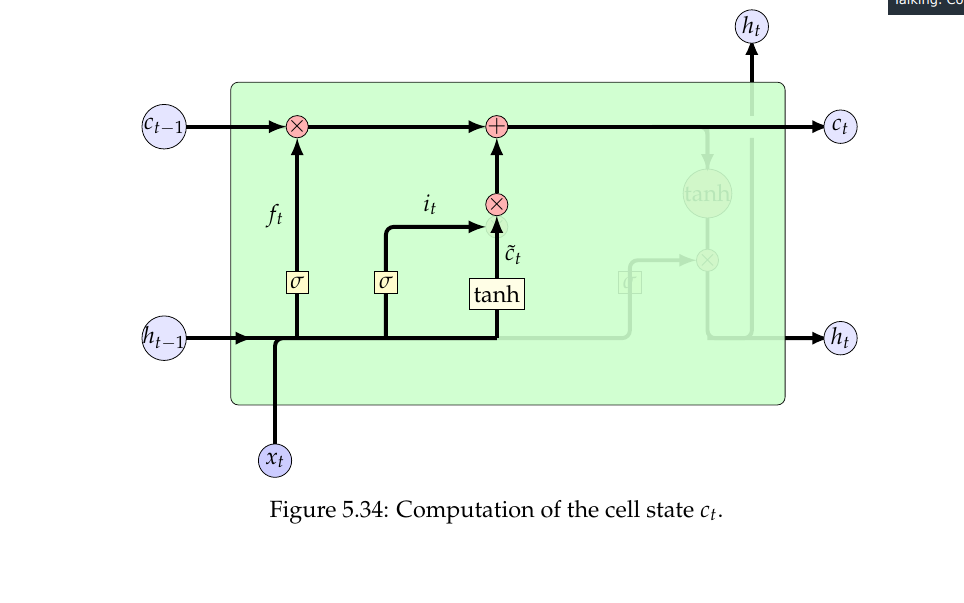

La memoria larga ($c_t)$ queda ahora como

$$c_t = c_{t-1} \circ f_t + i_t \circ \tilde{c} $$

## Output gate (compuerta de salida)


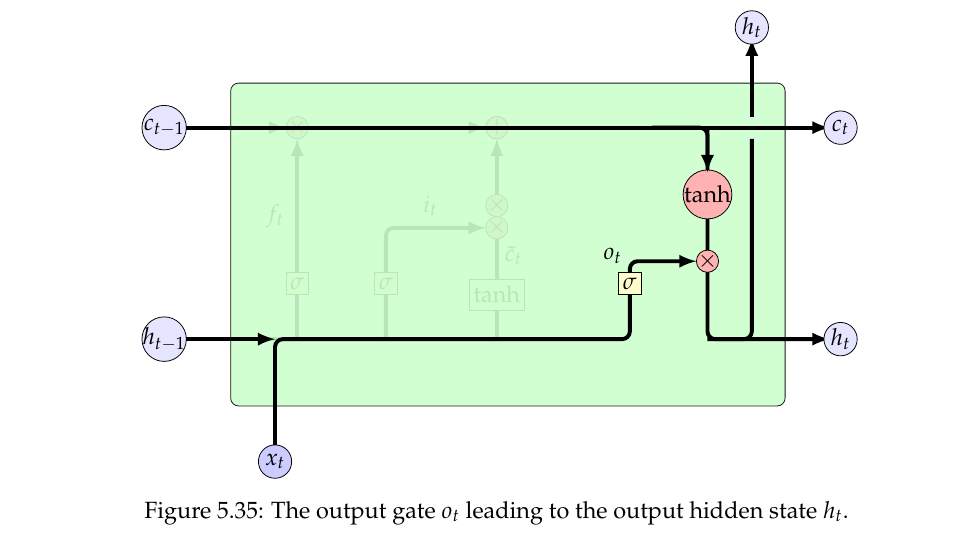

La matematica correspondiente a la compuerta de salida es

$$o_t  = \sigma(W_0 x_t + U_o h_{t-1} + b_0) $$

$$h_t = \tanh(c_t) \circ o_t $$

Hagamos un analisis dimensional
$$W_o \in \mathbb{R}^{h \times d} \quad , \quad
U_o \in \mathbb{R}^{h \times h} \quad  ,\quad b_0, o_t, h_t \in \mathbb{R}^h  $$

Recuerden que no hay una unica forma de definir una LSTM.
Voy a introducir dos variaciones de esta.

1. **peephole**: Esta fue introducida por Gers and Schmidhuber (2000) (referencia en las notas de clase).

La idea es agregar la memoria larga en el computo de las computeras. Un peso mas (una matriz de peso mas).

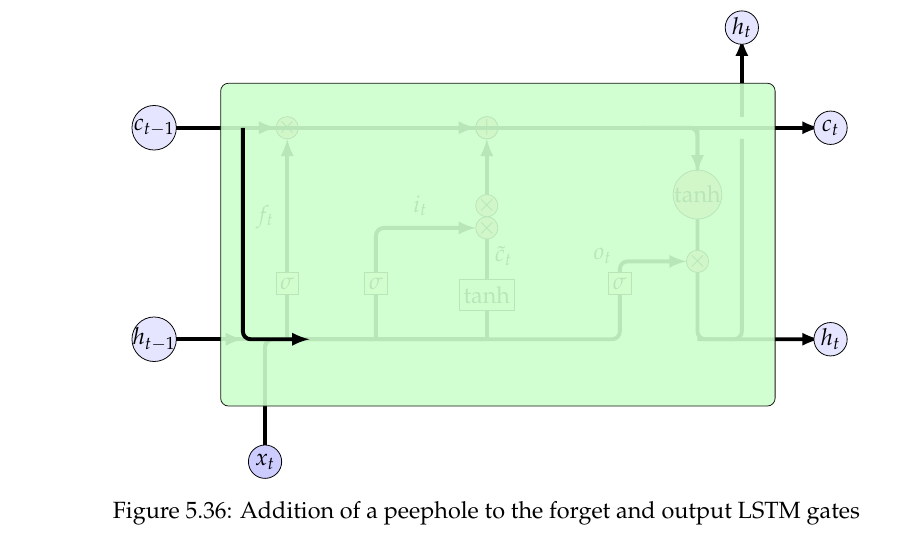

$$f_t = \sigma( W_f x_t + U_f h_{t-1} + V_f c_{t-1} + b_f) $$
$$i_t = \sigma(W_i x_t + U_i h_{t-1} + V_i c_{t-1} + b_f $$
Lo otro queda igual.

Otra variacion es que aveces se remueve, de estas dos ecuaciones la memoria corta $h_{t-1}$. Es decir

$$f_t = \sigma( W_f x_t  + V_f c_{t-1} + b_f) $$
$$i_t = \sigma(W_i x_t + V_i c_{t-1} + b_f $$

La ultima variacion se llama **peephole convolutional, introducida por Shi et al., 2015.
La matematica de esta red es:

$$f_t = \sigma( W_f \ast x_t + U_f \ast h_{t-1} + V_f \circ c_{t-1} + b_f $$
$$i_t = \sigma(W_i \ast x_t  + U_i \ast h_{t-1} + V_i \circ c_{t-1} + b_c) $$
$$c_t = f_t \circ c_{t-1} + i_t \circ \tanh(W_c \ast x_t+ U_c \ast h_{t-1} + b_c)  $$
$$o_t = \sigma(W_o \ast x_t + U_o \ast h_{t-1} + V_o \circ c_t + b_o) $$
$$h_t = o_t \circ \sigma(c_t) $$

Podemos pensar en los de entrada como $x_t, h_{t-1}$ como imagenes y las matrices como pixeles, y los pesos
$W_f, U_f, W_i, U_i, W_c, U_c, W_o, U_o$ como filtros.




**Ejemplo 5.5.1**:
La companhia C tiene la siguiente tabla de movimiento bursatil en 4 dias.



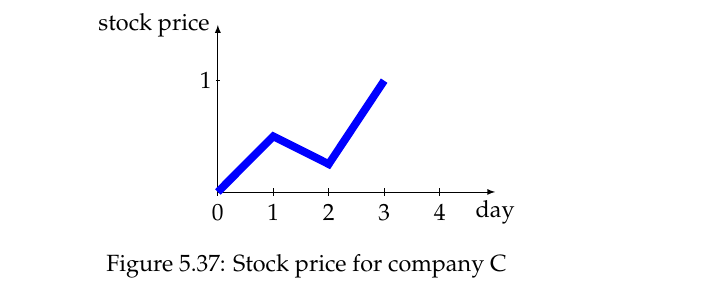

Los datos son $$(0, 0), (1, 0.5), (2.0.25), (1,1) $$

Los pesos son

$$ W_f = -1.2 \quad , U_f = 2.3  \quad , b_f = 0.62$$
$$ W_i = 0.65 \quad , U_i = 0.4  \quad , b_i = -0.4 $$
$$ W_g = -0.9 \quad , U_g = -1.41  \quad , b_g = 0.22 $$
$$ W_o = 0.39 \quad , U_o = 4.38 \quad , b_o = 0.79$$

* **Dia 1**: Asumimos que comenzamos en 0s. $x_o=0$, $c_o=0$, $h_o=0$.

$$f_t = \sigma(-1.2 \times 0 + 2.3 \times 0 + 0.62) \approx 0.65 $$

$$i_t = \sigma(0.65 \times 0 + 0.4 \times 0 + -1.4) \approx 0.65 $$


$$g_t = \tanh( -0.9 \times 0 + -1.41 \times 0 + 0.22) \approx 0.22 $$

$$o_1 = \sigma( 0.39 \times 0 + 4.38 \times 0 + 0.79) \approx 0.69$$

Recuerden que

$$c_t = c_{t-1} \circ f_t + i_t \circ \tilde{c} $$
donde $\tilde{c} = g_1$.

$$c_1 = 0.65 \times 0 + 0.2 \times 0.22 \approx 0.04 $$

$$h_1 = 0.69 \times \tanh(0.04) \approx 0.03 $$

Toca calcular para los dias 2,3, 4. La entrada $x_2=x_3=x_4=0$

Los producen
* **dia 2**:
\begin{eqnarray}
f_2 &=& 0.52 \\
i_2 &=& 0.26 \\
g_2 &=& -0.27 \\
o_2 &=& 0.75 \\
c_2 &=& -0.05 \\
h_2 &=& -0.03\\
\end{eqnarray}
No debe ser negativo. Los pesos estan malos.



* **dia 3**:
\begin{eqnarray}
f_3 &=& 0.56 \\
i_3 &=& 0.22 \\
g_3 &=& 0.04 \\
o_3 &=& 0.68 \\
c_3 &=& -0.02 \\
h_3 &=& -0.01\\
\end{eqnarray}


* **dia 4**:
\begin{eqnarray}
f_4 &=& 0.35 \\
i_4 &=& 0.32 \\
g_4 &=& -0.58 \\
o_4 &=& 0.76 \\
c_4 &=& -0.19 \\
h_4 &=& -0.14\\
\end{eqnarray}
La respuesta no tiene sentido. Por que? los pesos estan malos.

8:05?


Ejemplo en `python`

In [6]:
# importamos librerias
import numpy as np
class LSTMcell:
    def __init__(self, input_size, hidden_size):
        # inicializacion de los pesos
        self.input_size = input_size
        self.hidden_size = hidden_size

        # hard coded weights  for input gate
        self.W_i = np.random.randn(hidden_size, input_size)
        self.U_i = np.random.randn(hidden_size, input_size)
        self.b_i = np.zeros((hidden_size, 1))

        # weights for the forgate gate
        self.W_f = np.random.randn(hidden_size, input_size)
        self.U_f = np.random.randn(hidden_size, input_size)
        self.b_f = np.zeros((hidden_size, 1))

        # weights for the cell state
        self.W_c = np.random.randn(hidden_size, input_size)
        self.U_c = np.random.randn(hidden_size, input_size)
        self.b_c = np.zeros((hidden_size, 1))

        # weights for the output cell
        self.W_o = np.random.randn(hidden_size, input_size)
        self.U_o = np.random.randn(hidden_size, input_size)
        self.b_o = np.zeros((hidden_size, 1))

    # def sigmoid
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # tanh
    def tanh(self, x):
        return np.tanh(x)

    # forward
    def forward(self, x_t, h_prev, C_prev):
        # input gate
        i_t = self.sigmoid(np.dot(self.W_i, x_t) + np.dot(self.U_i, h_prev) + self.b_i)

        # forget gate
        f_t = self.sigmoid(np.dot(self.W_f, x_t) + np.dot(self.U_f, h_prev) + self.b_f)

        # cell state tilde
        C_tilde_t = self.tanh(np.dot(self.W_c, x_t) + np.dot(self.U_c, h_prev) + self.b_c)

        # output gate
        o_t = self.sigmoid(np.dot(self.W_o, x_t) + np.dot(self.U_o, h_prev) + self.b_o)

        # new hidden state (short memory)
        # h_t = np.multiply(o_t, self.tanh(C_tilde_t))
        h_t = o_t * self.tanh(C_tilde_t)

        # new cell state (long memory)
        # C_t = np.multiply(f_t, C_prev) + np.multiply(i_t, C_tilde_t)
        C_t = f_t * C_prev + i_t * C_tilde_t

        return h_t, C_t




In [8]:
# probamos el algoritmo
input_size = 3
hidden_size = 3

# creamos la LSTM
lstm_cell = LSTMcell(input_size, hidden_size)

# creamos datos "dummy" para el primer paso
x_t = np.random.randn(input_size, 1) # input at time step t=1

# inicializamos en ceros h_prev y el C_prev
h_prev = np.zeros((hidden_size, 1))
C_prev = np.zeros((hidden_size, 1))

# ejecutamos el forward
h_t, C_t = lstm_cell.forward(x_t, h_prev, C_prev)

print("New hidden state (short memory):")
print(h_t)
print("New cell state (long memory):")
print(C_t)


New hidden state (short memory):
[[-0.70631502]
 [ 0.23415856]
 [-0.00770462]]
New cell state (long memory):
[[-0.97918056]
 [ 0.00299431]
 [-0.04875125]]


In [ ]:
n

## Propagacion hacia atras en LSTM

Como lo hicimos antes

$$J = \sum_{t=1}^T J_t $$
Analizamos solamente el forget gate.

Cada $J_t$ depende de matrices $W=[W_f, U_f, b_f]$
Podemos mirar a un $J_k$ como funcion de $h_k, c_k, W$

$$J_k = J_k( h_k, c_k, W) $$
Usamos la regla generalizada de la cadena, donde usamos que
$c_k$ depende de $c_{k-1}$, que a su vez depende de $c_{k-2}$, y asi sucesivamente.

\begin{eqnarray}
\frac{\partial J_k}{\partial W} &=&
\frac{\partial J_k}{\partial h_k}
\frac{\partial h_k}{\partial c_k}
\frac{\partial c_k}{\partial c_{k-1}}
\cdots
\frac{\partial c_2}{\partial c_1}
\frac{\partial c_1}{\partial W}  \\
&=& \frac{\partial J_k}{\partial h_k}
\frac{\partial h_k}{\partial c_k}
\prod_{t=k}^2 \frac{\partial c_t}{\partial c_{t-1}}
\frac{\partial c_1}{\partial W}
\end{eqnarray}

Queremos estudiar como el termino del medio

$$\prod_{t=k}^2 \frac{\partial c_t}{\partial c_{t-1}} $$

Reucuerden que

$$c_t = c_{t-1} \circ f_t + i_t \circ \tilde{c}_t $$

Les recomiendo que miren el apendice B de las notas de clase.

\begin{eqnarray}
\frac{\partial c_t}{\partial c_{t-1}} &=& \frac{\partial }{\partial c_{t-1}} [ c_{t-1} \circ f_t + i_t \circ \tilde{c}_t] \\
&=& \frac{\partial c_{t-1}}{\partial c_{t-1}} \circ f_t + c_{t-1} \circ \frac{\partial f_t}{\partial c_{t-1} }  + \frac{\partial i_t}{\partial c_{t-1}} \circ \tilde{c}_t + i_t \circ \frac{\partial \tilde{c}_t}{\partial c_{t-1}} \\
&=& I \circ f_t + c_{t-1} \circ \frac{\partial f_t}{\partial c_{t-1} }  + \frac{\partial i_t}{\partial c_{t-1}} \circ \tilde{c}_t + i_t \circ \frac{\partial \tilde{c}_t}{\partial c_{t-1}}  
\tag{1}
\end{eqnarray}

Vamos a analizar cada termino de la Ecuacion (1) para interpretar si puede haber algun tipo de inestabilidad (vanishing/exploding gradient).

La identidad es completamente estable. El producto de la identidad for $f_t$ es una matriz diagonal con $f_t$ en la diagonal.


* $\frac{\partial f_t}{\partial c_{t-1}}$:
Recuerden que

$$f_t = \sigma( W_f x_t + U_f h_{t-1} + b_f) = \sigma[ W_f x_t +  U_f \tanh(c_{t-1}) \circ o_{t-1}  + b_f]$$
Si llamamos $z=  W_f x_t +  U_f \tanh(c_{t-1}) \circ o_{t-1}  + b_f$
entonces





$$\frac{\partial f_t}{\partial c_{t-1}} = \sigma'(z) U_f \tanh'(c_{t-1})(I \circ o_{t-1}) $$

Para estimar que tanto puedan crecer o decrecer estas cantidades tenemos en cuenta lo siguiente

$$0 \le \sigma'(z) \le 0.25 $$
$$0 \le \tanh'(z) \le 1 $$
$$0 \le o_{t-1} \le 1 $$
puesto que $o_{t-1}$ es el sigmoid logistic.

Que me dice esto del tamanho de $\partial f_t/\partial c_{t-1}$

* $\frac{\partial i_t}{\partial c_{t-1}}$: Recuerde
$$i_t = \sigma( W_i x_t + U_i h_{t-1} + b_i) =
\sigma [ W_t x_t + U_i \tanh(c_{t-1}) \circ o_{t-1} + b_i]$$

De forma que

Si llamamos
$z = W_t x_t + U_i U_i \tanh(c_{t-1}) \circ o_{t-1} + b_i$
$$
\frac{\partial i_t}{\partial c_{t-1}} =  \sigma'(z) U_i \tanh'(c_{t-1}) I \circ o_{t-1}
$$
Usamos los mismos argumentos de arriba para ver que este numero es pequenho.


La ultima derivada es

* $\frac{\partial \tilde{c}}{\partial c_{t-1}} $:

Sabemos

$$\tilde{c} = \tanh ( W_c x_t + U_c h_{t-1} + b_c) =
\tanh[ W_c x_t + U_c \tanh(c_{t-1}) \circ o_{t-1} + b_c]$$

Si
$z = W_c x_t + U_c \tanh(c_{t-1}) \circ o_{t-1} + b_c$
entonces

$$\frac{\partial \tilde{c}_t}{\partial c_{t-1}} = \tanh'(z) U_c \tanh'(c_{t-1}) I \circ o_{t-1} $$

La idea es que todos los terminos despues del primero $I \circ f_t$ son pequenhos, mientras que el primero tiene a "uno".

Este argumento no es muy solido, por que
* $f_t$  pudiera ser pequenho
* Las matrices (pesos) $W_., U_.$ se asumen que no divergen.

Una forma de garantizar esto es normalizando los pesos.
De cuerlquier forma el LSTM es mucho mas estable que las RNN.
De hecho los autores reclaman que este metodo es estable incluso sobre 1000 pasos (celdas), mientras que los RNN si mucho 10 pasos.

Ahora bien, el trabajo original de Hochreiter y Schimidhuber asume que la "foget cell" es 1. Con esto se asegura que el primero termino es la identidad.

## Aplicaciones del LSTM
Los enlaces estan en las notas de clase.

* Generacion de Musica. Las notas de clase muestran 4 enlaces con esta aplicacion.o

* Sentiment Analysis: Esto analiza las opiniones extraidas de un texto para indicar si son positivas, negativas o neutras.

* Machine Translation (traduccion). Es bueno pero obviamente superado por el "transformer"

* Prediccion de trayectoria. Para autonomous driving.

* Clasificacion de imagenes y el "captioning"

* Transcripcion de voz.

* Google Voice Search.

* Stock prediction.